# Importing packages

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import  matplotlib.pyplot as plt 

# Data Preparation:

In [15]:
data_frame= pd.read_csv("stock_data.csv")

In [16]:
data_frame.head()

,time,open,high,low,close,volume
0,3/25/2022 19:19,131.300,131.30,131.300,131.30,718
1,3/25/2022 19:18,131.300,131.30,131.300,131.30,282
2,3/25/2022 17:50,131.300,131.30,131.300,131.30,100
3,3/25/2022 16:59,131.340,131.35,131.340,131.35,1427
4,3/25/2022 16:42,131.326,131.35,131.326,131.35,1326


## Checking the missing values:

In [17]:
data_frame.isna().sum()

time      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

## Checking Duplicate Values:

In [18]:
data_frame.duplicated().sum()

0

# Data Exploration:

Check relationships and column distributions:

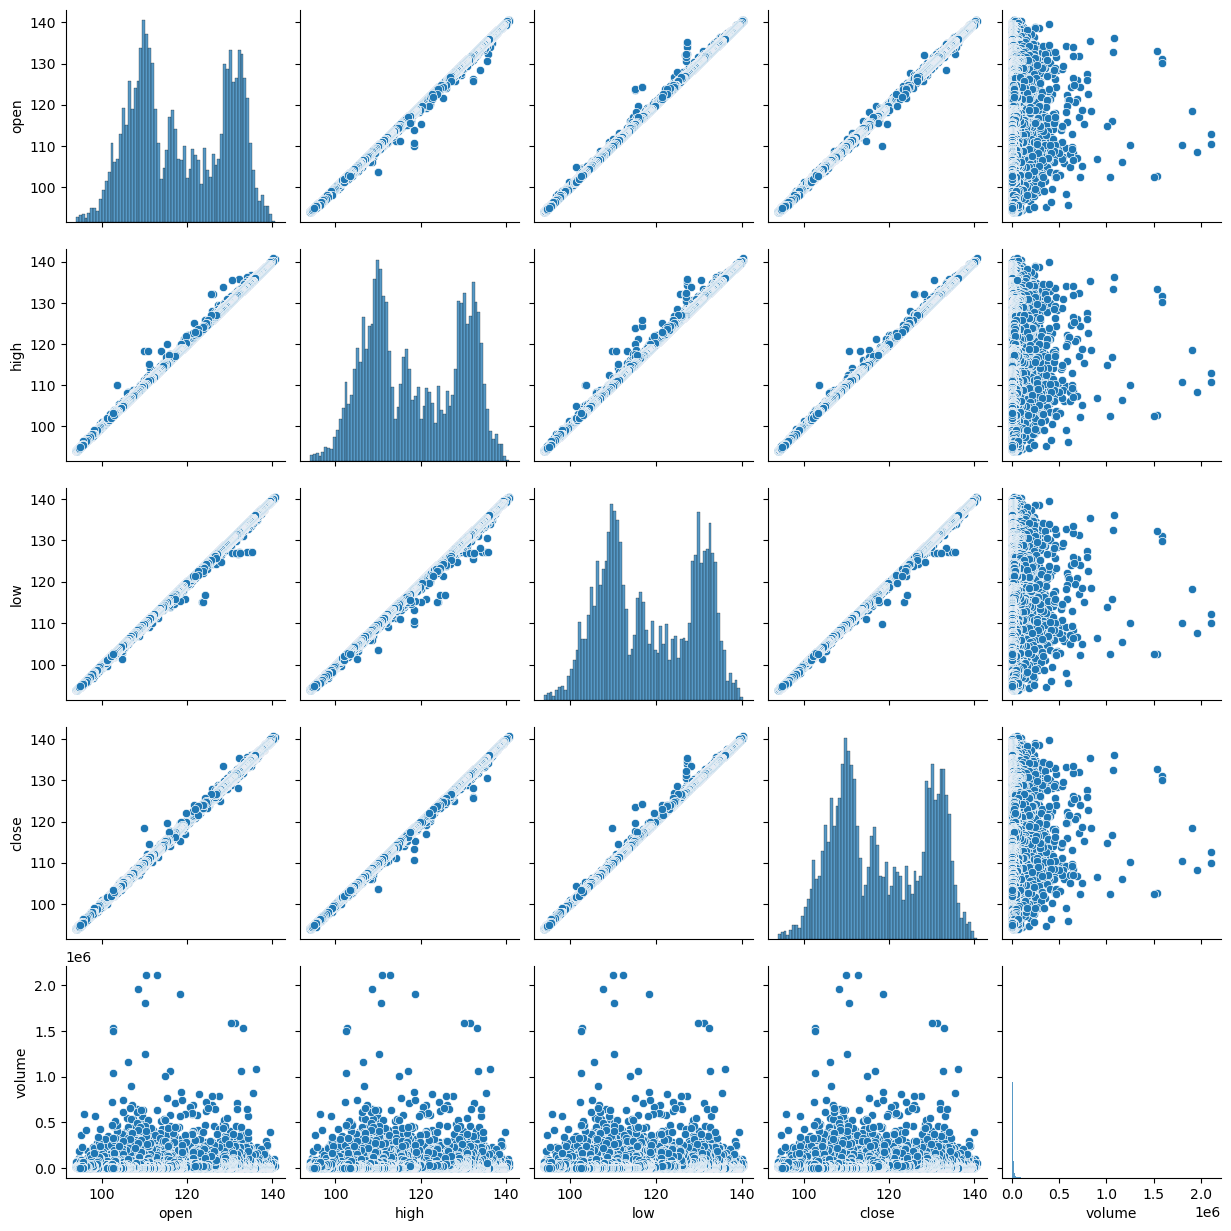

In [19]:
sns.pairplot(data_frame);

## Checking correlation between variables:

In [20]:
data_frame.corr()

C:\Users\kolic\AppData\Local\Temp\ipykernel_44756\3812265915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_frame.corr()


,open,high,low,close,volume
open,1.000000,0.999976,0.999972,0.999972,-0.030462
high,0.999976,1.000000,0.999947,0.999978,-0.029033
low,0.999972,0.999947,1.000000,0.999971,-0.031974
close,0.999972,0.999978,0.999971,1.000000,-0.030500
volume,-0.030462,-0.029033,-0.031974,-0.030500,1.000000


C:\Users\kolic\AppData\Local\Temp\ipykernel_44756\529080468.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_frame.corr()).set(title ='Correlation within Variables') ;


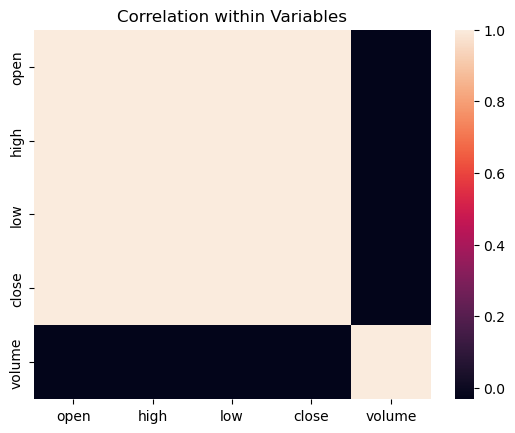

In [21]:
sns.heatmap(data_frame.corr()).set(title ='Correlation within Variables') ;

This is a Strong Correlation

# #Checking Outliners:

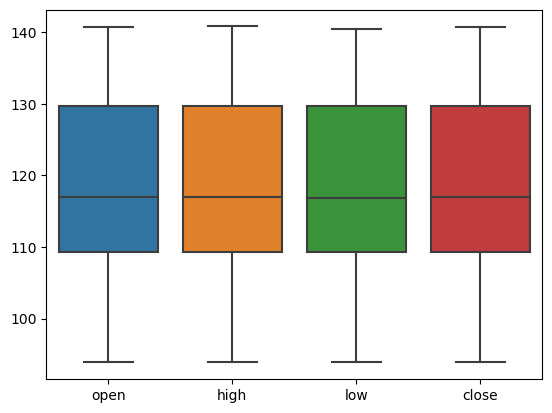

In [25]:
sns.boxplot(data = data_frame.drop("volume" , axis = 1));

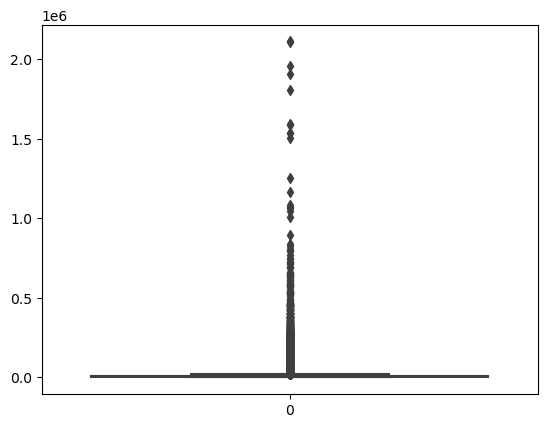

In [26]:
sns.boxplot(data = data_frame.volume);

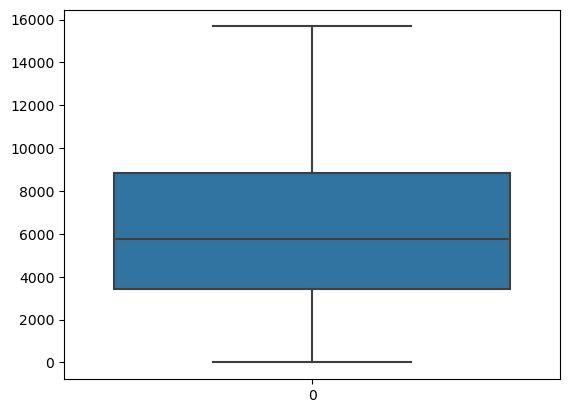

In [27]:
sns.boxplot(data_frame[data_frame.volume <( data_frame.volume.quantile(0.25) + 1.5*(data_frame.volume.quantile(0.75)-data_frame.volume.quantile(0.25)))].volume);

# Preparing our Training and Testing datasets

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
A = data_frame.drop(["high","time"] , axis = 1)
B = np.array(data_frame.high).reshape(-1,1)

In [30]:
A_train , A_test ,B_train ,B_test = train_test_split(A,B)

In [32]:
print(A_train.shape , B_train.shape)

(162662, 4) (162662, 1)


# Creating the Model:

In [33]:
from sklearn.linear_model import LinearRegression 

In [34]:
LR = LinearRegression()

In [36]:
LR.fit(A_train ,B_train)

LinearRegression()

In [38]:
A_test.shape

(54221, 4)

In [39]:
B_pred = LR.predict(A_test)

# Testing the Model:

In [40]:
from sklearn.metrics import mean_squared_error  , r2_score,mean_absolute_error

In [41]:
print("R2 Score is : {:03f}".format(r2_score(B_test ,B_pred)))
print("Root Mean Squared Error is : {:03f}".format(mean_squared_error(B_test ,B_pred , squared = False)))
print("Mean Absolute Error is : {:03f}".format(mean_absolute_error(B_test ,B_pred)))

R2 Score is : 0.999978
Root Mean Squared Error is : 0.051215
Mean Absolute Error is : 0.022980
